# UFO SIGHTING RESEARCH
## Research Question: Predict the shape of a UFO given certain features about the context of the observed encounter.

### By Annie Center, Sean DeLacerda, and E.J. Rollo

The dataset used in this project was scraped from NUFORC.org by Timothy Renner and posted to data.world. It contains nearly 90,000 reports of UFO sightings in the US and Canada including information on the location, time, shape, duration, etc. We will use this data to predict the shape of a UFO given certain features about the context of the observed encounter.



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
sns.set()
rcParams['figure.figsize'] = 12,6
sns.set_context('talk')   # 'talk' for slightly larger
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('https://query.data.world/s/4vicgqesotkow23wc4q2g22vbrh5kz')

## Exploring the dataset & preprocessing:
### Removing columns that have no clear predictive quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98353 entries, 0 to 98352
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         98305 non-null  object 
 1   city            98052 non-null  object 
 2   state           92707 non-null  object 
 3   date_time       97027 non-null  object 
 4   shape           94682 non-null  object 
 5   duration        93952 non-null  object 
 6   stats           98316 non-null  object 
 7   report_link     98353 non-null  object 
 8   text            98280 non-null  object 
 9   posted          97027 non-null  object 
 10  city_latitude   80483 non-null  float64
 11  city_longitude  80483 non-null  float64
dtypes: float64(2), object(10)
memory usage: 9.0+ MB


### 12 columns of data with only 2 being numeric

In [4]:
df.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,freaked me out,San Jose,CA,2021-05-06T21:00:00,sphere,2 minutes,Occurred : 5/6/2021 21:00 (Entered as : 05/06...,http://www.nuforc.org/webreports/163/S163041.html,freaked me out I looked up into the night sky ...,2021-05-20T00:00:00,37.338842,-121.889706
1,"One object observed at closer ground distance,...",Somerset,KY,NaN,unknown,2400 hours,Occurred : Reported: 12/21/2019 8:49:14 PM 2...,http://www.nuforc.org/webreports/151/S151813.html,"One object observed at closer ground distance,...",NaN,37.090361,-84.498169
2,UFO contact we made during Desert Shield in th...,NaN,NaN,NaN,NaN,NaN,Occurred : Reported: 5/16/2021 4:55:36 PM 16...,http://www.nuforc.org/webreports/163/S163175.html,UFO contact we made during Desert Shield in th...,NaN,NaN,NaN
3,"Over a course of 5 years, I have seen UFOs, ob...",Germantown,MD,2005-07-06T12:00:00,formation,Years,Occurred : 7/6/1905 12:00 (Entered as : 2014 ...,http://www.nuforc.org/webreports/162/S162867.html,"Over a course of 5 years, I have seen UFOs, ob...",2021-05-20T00:00:00,39.154986,-77.272538
4,"Driving north on US 87 just outside Brady, Tex...",Brady,TX,2020-01-29T19:45:00,light,Lights disappear,Occurred : 1/29/2020 19:45 (Entered as : 01/2...,http://www.nuforc.org/webreports/152/S152953.html,"Driving north on US 87 just outside Brady, Tex...",2020-01-31T00:00:00,31.145100,-99.347800


#### With a majority of the columns being non-numeric we will need to remove the ones that will have no predictive use for determining the shape of a UFO. These columns along with the time series data will be dropped (time series analysis is outside the scope of the course). 

#### dropping columns date_time, stats, and posted:

-posted does not have predictive value since it's when the report was posted

-stats is reusing data from the date_time column and is not needed 

In [5]:
dropped = ['date_time', 'stats', 'posted']
df.drop(dropped, axis=1, inplace=True)
df.head(5)

,summary,city,state,shape,duration,report_link,text,city_latitude,city_longitude
0,freaked me out,San Jose,CA,sphere,2 minutes,http://www.nuforc.org/webreports/163/S163041.html,freaked me out I looked up into the night sky ...,37.338842,-121.889706
1,"One object observed at closer ground distance,...",Somerset,KY,unknown,2400 hours,http://www.nuforc.org/webreports/151/S151813.html,"One object observed at closer ground distance,...",37.090361,-84.498169
2,UFO contact we made during Desert Shield in th...,NaN,NaN,NaN,NaN,http://www.nuforc.org/webreports/163/S163175.html,UFO contact we made during Desert Shield in th...,NaN,NaN
3,"Over a course of 5 years, I have seen UFOs, ob...",Germantown,MD,formation,Years,http://www.nuforc.org/webreports/162/S162867.html,"Over a course of 5 years, I have seen UFOs, ob...",39.154986,-77.272538
4,"Driving north on US 87 just outside Brady, Tex...",Brady,TX,light,Lights disappear,http://www.nuforc.org/webreports/152/S152953.html,"Driving north on US 87 just outside Brady, Tex...",31.145100,-99.347800


#### will remove the text based columns which will not be used as predictors

In [6]:
dropped2 = ['summary', 'text', 'report_link']
df.drop(dropped2, axis=1, inplace=True)
df.head(5)

,city,state,shape,duration,city_latitude,city_longitude
0,San Jose,CA,sphere,2 minutes,37.338842,-121.889706
1,Somerset,KY,unknown,2400 hours,37.090361,-84.498169
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Germantown,MD,formation,Years,39.154986,-77.272538
4,Brady,TX,light,Lights disappear,31.145100,-99.347800


### The dataset has been scaled down to remove the time series and text based columns which have no predictive qualities

#### The output of each column shows a significant number of NaN values indicating that a lot of emphasis must be put into preprocessing to clean the data and prepare it for further exploration

In [7]:
# Count the NaN values in the columns
df.isna().sum()

city                301
state              5646
shape              3671
duration           4401
city_latitude     17870
city_longitude    17870
dtype: int64

#### Since we are interested in predicting the shape of the UFO, we'll explore the shape column next by looking into the number of unique shapes that were sighted and number of occurances in states and cities

In [8]:
# 21 unique shapes of sightings
print('UNIQUE SHAPES')
print( df['shape'].value_counts())
print('NUMBER OF SHAPES')
print(df['shape'].value_counts().size)

UNIQUE SHAPES
light        20559
circle       11342
triangle      8557
fireball      7443
unknown       6712
sphere        6709
other         6385
disk          4950
oval          4222
formation     3420
changing      2370
cigar         2227
flash         1797
rectangle     1777
cylinder      1518
diamond       1389
chevron       1044
teardrop       830
egg            727
cone           373
cross          331
Name: shape, dtype: int64
NUMBER OF SHAPES
21


#### Out of the 21 unique shapes discovered, 2 of them (unknown and other) will be replaced with unidentified

In [9]:
# Will fill NaN values with unidentified and combine unknown and other with unidentified
df['shape'] = df['shape'].fillna('unidentified')
df['shape'] = df['shape'].replace(to_replace='unknown', value='unidentified')
df['shape'] = df['shape'].replace(to_replace='other', value='unidentified')
df['shape'].value_counts()

light           20559
unidentified    16768
circle          11342
triangle         8557
fireball         7443
sphere           6709
disk             4950
oval             4222
formation        3420
changing         2370
cigar            2227
flash            1797
rectangle        1777
cylinder         1518
diamond          1389
chevron          1044
teardrop          830
egg               727
cone              373
cross             331
Name: shape, dtype: int64

#### Since we may reference location data in our predictions, we will need to drop the rows where this data is missing

In [10]:
# removing rows with empty city, state. longitude, latitude data
idx = df[ df['city'].isna() | df['state'].isna() | df['city_latitude'].isna() | df['city_longitude'].isna()].index
df.drop(idx, inplace=True)
df.head(10)

,city,state,shape,duration,city_latitude,city_longitude
0,San Jose,CA,sphere,2 minutes,37.338842,-121.889706
1,Somerset,KY,unidentified,2400 hours,37.090361,-84.498169
3,Germantown,MD,formation,Years,39.154986,-77.272538
4,Brady,TX,light,Lights disappear,31.145100,-99.347800
5,San Diego,CA,fireball,2 seconds,32.787229,-117.140268
6,Las Vegas,NV,triangle,30,36.141246,-115.186592
7,Bear,DE,triangle,3 minutes,39.602500,-75.694500
8,Port Charlotte,FL,rectangle,10 seconds,26.981007,-82.116907
9,Battle Creek,MI,light,2 minutes,42.327893,-85.188559
10,Detroit,MI,flash,45 minutes,42.368855,-83.110268


### Checking for NaN values again to confirm (sanity check!)

In [11]:
df.isna().sum()

city                 0
state                0
shape                0
duration          3551
city_latitude        0
city_longitude       0
dtype: int64

#### The duration column is an interesting data point and though it may require a lot of processing to convert it to a numeric number with standardized units, we will leave it in place for now

#### We will also leave the URL's to the reports in place for future reference

## Now that the dataset is cleaned, we'll begin exploring our predictors and target data both numerically and graphically:

### Exploring the shape column

The proportion of shapes is heavily weighted towards light and unidentified indicating a lot of vagueness in an observed sighting, which is to be expected

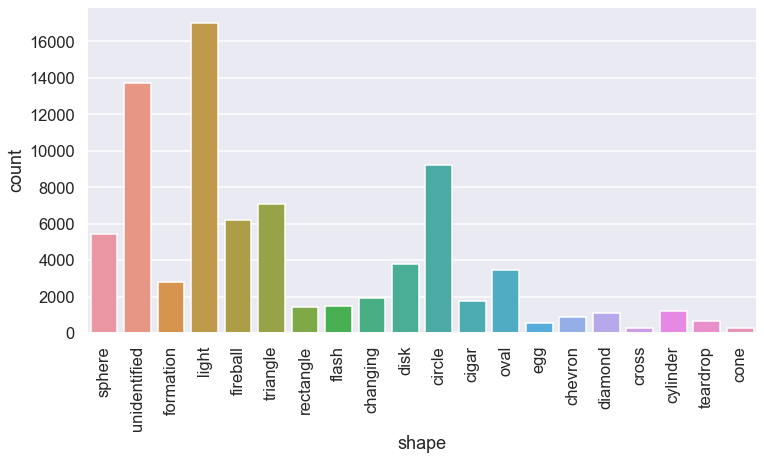

In [12]:
sns.countplot(x="shape", data=df);
plt.xticks(rotation=90);

### Exploring the data by a single state (CA)

In [13]:
st = 'CA'
df_CA = df[ df['state'] == st].copy()
df_CA.head(10)

,city,state,shape,duration,city_latitude,city_longitude
0,San Jose,CA,sphere,2 minutes,37.338842,-121.889706
5,San Diego,CA,fireball,2 seconds,32.787229,-117.140268
18,Santa Maria,CA,circle,19:00,34.868013,-120.355711
29,Los Angeles,CA,disk,5+ minutes,34.050707,-118.279935
46,Watsonville,CA,unidentified,NaN,36.950275,-121.724742
57,San Jose,CA,unidentified,~5mins,37.338842,-121.889706
66,Davis,CA,unidentified,30 seconds?,38.485225,-121.643576
81,Salinas,CA,disk,5 minutes,36.688525,-121.628455
126,Elk Grove,CA,unidentified,30 seconds,38.394469,-121.371859
148,Victorville,CA,light,2 seconds,34.520176,-117.340739


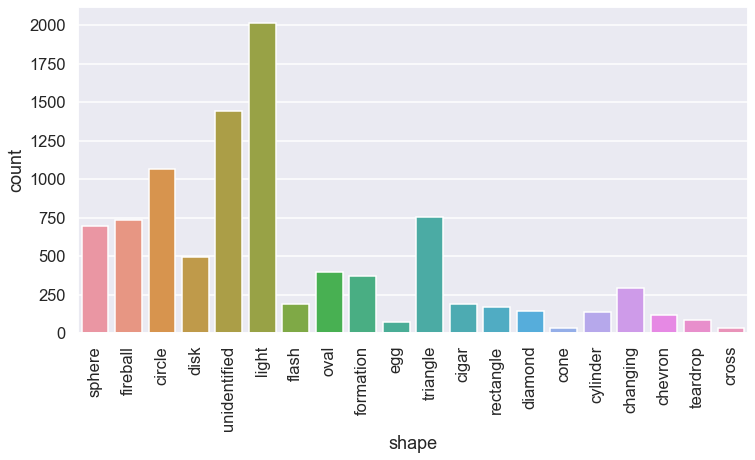

In [14]:
sns.countplot(x="shape", data=df_CA);
plt.xticks(rotation=90);

### In order to prepare the data for supervised machine learning through a linear regression imeplementation, we need to convert our categorical columns to numeric

First we're going to cleanup the target of our prediction, the shape column, and create a mapping dictionary to assign numeric values to each shape

In [15]:
df['shape'].value_counts()

light           17039
unidentified    13700
circle           9217
triangle         7107
fireball         6214
sphere           5424
disk             3821
oval             3444
formation        2822
changing         1952
cigar            1790
flash            1475
rectangle        1438
cylinder         1239
diamond          1126
chevron           866
teardrop          674
egg               566
cone              294
cross             275
Name: shape, dtype: int64

#### Shapes encoded as numbers from 1-20

In [16]:
shapeToNum = {"shape": {"light": 1, "unidentified": 2, "circle": 3, "triangle": 4, "fireball": 5, "sphere": 6, "disk": 7, "oval": 8, "formation": 9, "changing": 10, "cigar": 11,
                       "flash": 12, "rectangle": 13, "cylinder": 14, "diamond": 15, "chevron": 16, "teardrop": 17, "egg": 18, "cone": 19, "cross": 20}}
df = df.replace(shapeToNum)
df.head(10)

,city,state,shape,duration,city_latitude,city_longitude
0,San Jose,CA,6,2 minutes,37.338842,-121.889706
1,Somerset,KY,2,2400 hours,37.090361,-84.498169
3,Germantown,MD,9,Years,39.154986,-77.272538
4,Brady,TX,1,Lights disappear,31.145100,-99.347800
5,San Diego,CA,5,2 seconds,32.787229,-117.140268
6,Las Vegas,NV,4,30,36.141246,-115.186592
7,Bear,DE,4,3 minutes,39.602500,-75.694500
8,Port Charlotte,FL,13,10 seconds,26.981007,-82.116907
9,Battle Creek,MI,1,2 minutes,42.327893,-85.188559
10,Detroit,MI,12,45 minutes,42.368855,-83.110268


#### Removing any state data outside the U.S.

In [17]:
df['state'].sort_values(ascending=True).unique()

array(['AB', 'AK', 'AL', 'AR', 'AZ', 'BC', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MB', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NB', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NL', 'NM', 'NS', 'NT', 'NV', 'NY', 'OH', 'OK',
       'ON', 'OR', 'PA', 'PE', 'QC', 'RI', 'SC', 'SD', 'SK', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YT'], dtype=object)

In [18]:
idxNotState = df[ (df['state'] == 'AB') | (df['state'] == 'BC') | (df['state'] == 'DC') | (df['state'] == 'MB') | (df['state'] == 'NB') | (df['state'] == 'NL') |
                (df['state'] == 'NS') | (df['state'] == 'NT') | (df['state'] == 'ON') | (df['state'] == 'PE') | (df['state'] == 'QC') | (df['state'] == 'SK') |
                (df['state'] == 'YT') ].index
df.drop(idxNotState, inplace=True)
df['state'].sort_values(ascending=True).unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

### Convert each state from a categorical to numeric column in order to experiment with it as a predictor

In [19]:
df = pd.get_dummies(df, columns=['state'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77594 entries, 0 to 98352
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            77594 non-null  object 
 1   shape           77594 non-null  int64  
 2   duration        74129 non-null  object 
 3   city_latitude   77594 non-null  float64
 4   city_longitude  77594 non-null  float64
 5   state_AL        77594 non-null  uint8  
 6   state_AR        77594 non-null  uint8  
 7   state_AZ        77594 non-null  uint8  
 8   state_CA        77594 non-null  uint8  
 9   state_CO        77594 non-null  uint8  
 10  state_CT        77594 non-null  uint8  
 11  state_DE        77594 non-null  uint8  
 12  state_FL        77594 non-null  uint8  
 13  state_GA        77594 non-null  uint8  
 14  state_HI        77594 non-null  uint8  
 15  state_IA        77594 non-null  uint8  
 16  state_ID        77594 non-null  uint8  
 17  state_IL        77594 non-null 

In [20]:
df.head()

,city,shape,duration,city_latitude,city_longitude,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,San Jose,6,2 minutes,37.338842,-121.889706,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Somerset,2,2400 hours,37.090361,-84.498169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Germantown,9,Years,39.154986,-77.272538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Brady,1,Lights disappear,31.145100,-99.347800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,San Diego,5,2 seconds,32.787229,-117.140268,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Since this dataset is lacking in the number of viable predictors, we will add features about the context of the UFO sighting and fill the column with random 0's and 1's

In [21]:
rowCnt = len(df.axes[0])
data = np.random.randint(0, 2, size=rowCnt)
df['rural_area'] = data
data = np.random.randint(0, 2, size=rowCnt)
df['city_area'] = data
data = np.random.randint(0, 1, size=rowCnt)
df['observer_alone'] = data
df.loc[df['shape'] == 6, 'observer_alone'] = 1
data = np.random.randint(0, 2, size=rowCnt)
df['driving'] = data
data = np.random.randint(0, 2, size=rowCnt)
df['ufo_believer'] = data
df.loc[df['shape'] == 6, 'ufo_believer'] = 1
data = np.random.randint(0, 2, size=rowCnt)
df['alcohol_consumed'] = data
data = np.random.randint(0, 2, size=rowCnt)
df['multiple_ufo_sighted'] = data
data = np.random.randint(0, 2, size=rowCnt)
df['near_ocean'] = data

In [22]:
df.head(10)

,city,shape,duration,city_latitude,city_longitude,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,rural_area,city_area,observer_alone,driving,ufo_believer,alcohol_consumed,multiple_ufo_sighted,near_ocean
0,San Jose,6,2 minutes,37.338842,-121.889706,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0
1,Somerset,2,2400 hours,37.090361,-84.498169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
3,Germantown,9,Years,39.154986,-77.272538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1
4,Brady,1,Lights disappear,31.145100,-99.347800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
5,San Diego,5,2 seconds,32.787229,-117.140268,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1
6,Las Vegas,4,30,36.141246,-115.186592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
7,Bear,4,3 minutes,39.602500,-75.694500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0
8,Port Charlotte,13,10 seconds,26.981007,-82.116907,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
9,Battle Creek,1,2 minutes,42.327893,-85.188559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
10,Detroit,12,45 minutes,42.368855,-83.110268,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1


We'll take a look at the sitings in CA based on latitude/longitude data

C:\Users\annie\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


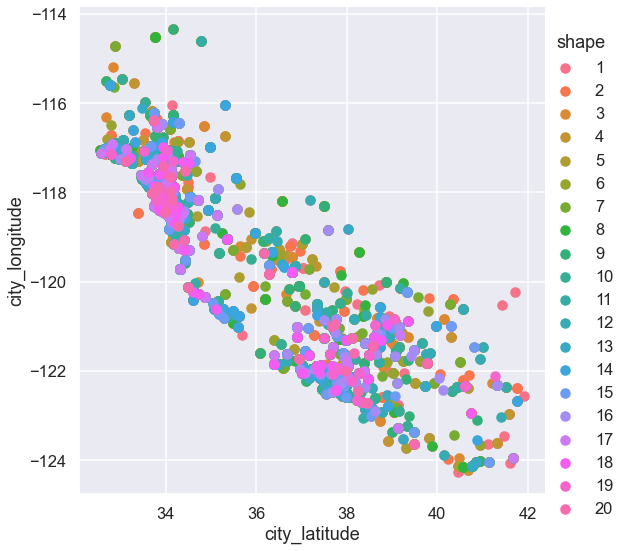

In [23]:
sns.FacetGrid(df[df['state_CA'] == 1], hue='shape', size=8).map(plt.scatter, 'city_latitude', 'city_longitude').add_legend();

## MACHINE LEARNING USING LINEAR REGRESSION

First we will explore the data for a single state (CA) and use the feature near_ocean as a predictor

In [24]:
df.columns

Index(['city', 'shape', 'duration', 'city_latitude', 'city_longitude',
       'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY', 'rural_area', 'city_area', 'observer_alone', 'driving',
       'ufo_believer', 'alcohol_consumed', 'multiple_ufo_sighted',
       'near_ocean'],
      dtype='object')

In [25]:
df2 = df[ df['state_CA'] == 1 ]

predictors = ['near_ocean']
target = 'shape'
X_ca = df2[predictors].values
y_ca = df2[target].values

Next we will create our training and test data sets using no randomness so that we have some consistency in our analysis when we rerun the notebook. We will use a 70/30 split between training/test data sets.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ca, y_ca, test_size=0.30, random_state=0)

### Baseline performance uses the mean of our target training data to compute the Root Mean Squared Error

The baseline performance yields a shape value of 4.3 which with rounding gives us 4, the shape of triangle. 

In [27]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

x = rmse(y_train.mean(), y_test)
print('test, rmse baseline: {0:.1f}'.format(x))

test, rmse baseline: 4.3


### Now we will begin making predictions with training data.

These are the coefficients associated with our predictor

In [28]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
fit1 = reg1.predict(X_train)

print('intercept: {:.2f}'.format(reg1.intercept_.item(0)))
print('coefficients:')
print('\t{:.2f}'.format(reg1.coef_[0]))

intercept: 5.17
coefficients:
	0.02


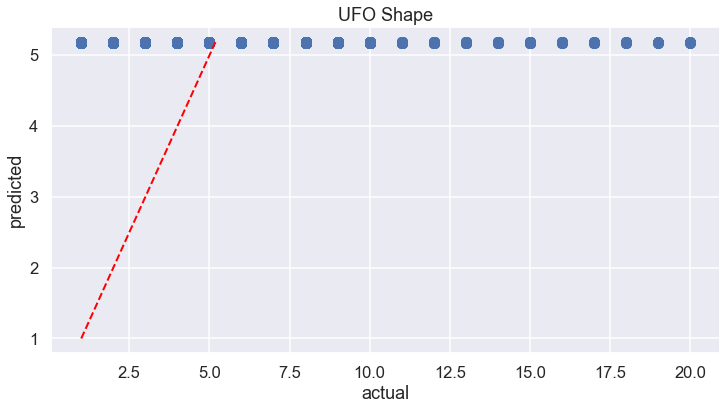

In [29]:
def plot_actual_predicted(actual, predicted, title):
    plt.scatter(actual, predicted)
    plt.title(title)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    a = [actual.min(), actual.min()]
    b = [predicted.max(), predicted.max()]
    x_values = [a[0], b[0]]
    y_values = [a[1], b[1]]
    plt.plot(x_values, y_values, linestyle='dashed', color="red", linewidth=2)

plot_actual_predicted(y_train, reg1.predict(X_train), 'UFO Shape')

Evaluating RMSE and R-squared show no relationship with the single predictor since the R-square value is essentially 0 and RMSE is the same as the baseline.

In [30]:
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, reg1.predict(X_train)))))
print('r-squared value: {:.4f}'.format(reg1.score(X_train,y_train)))

RMSE: 4.30
r-squared value: 0.0000


We only used a single predictor of whether the observer was near the ocean and this yielded a very low r-squared value of 0.0006 whereas we want to be around 0.70 or higher.

### Now we'll use the test data for predictions

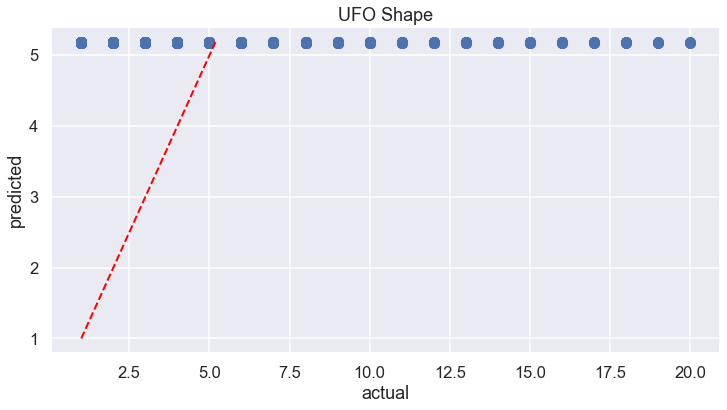

In [31]:
plot_actual_predicted(y_test, reg1.predict(X_test), 'UFO Shape')

There is no better predictive quality using the test data, will need to add more features

In [32]:
print('RMSE: {:.2f}'.format(rmse(reg1.predict(X_test),y_test)))
print('r-squared value: {:.4f}'.format(reg1.score(X_test, y_test)))

RMSE: 4.35
r-squared value: -0.0008


### Next we'll create a new model using more predictors

In [33]:
# all columns: ['rural_area', 'city_area', 'observer_alone', 'driving', 'ufo_believer', 'alcohol_consumed', 'multiple_ufo_sighted', 'near_ocean']
df2 = df[ df['state_CA'] == 1 ]
predictors = ['observer_alone', 'rural_area', 'near_ocean', 'ufo_believer']
target = 'shape'
X_ca2 = df2[predictors].values
y_ca2 = df2[target].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_ca2, y_ca2, test_size=0.30, random_state=0)

def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

x = rmse(y_train.mean(), y_test)
print('test, rmse baseline: {0:.1f}'.format(x))

test, rmse baseline: 4.3


In [35]:
reg2 = LinearRegression()
reg2.fit(X_train, y_train)
fit2 = reg2.predict(X_train)

print('intercept: {:.2f}'.format(reg2.intercept_.item(0)))
print('coefficients:')
print('\t{:.2f}'.format(reg2.coef_[0]))
print('\t{:.2f}'.format(reg2.coef_[1]))
print('\t{:.2f}'.format(reg2.coef_[2]))
print('\t{:.2f}'.format(reg2.coef_[3]))

intercept: 5.03
coefficients:
	0.86
	0.11
	0.02
	0.04


We begin to see a prediction towards shape 6, a sphere

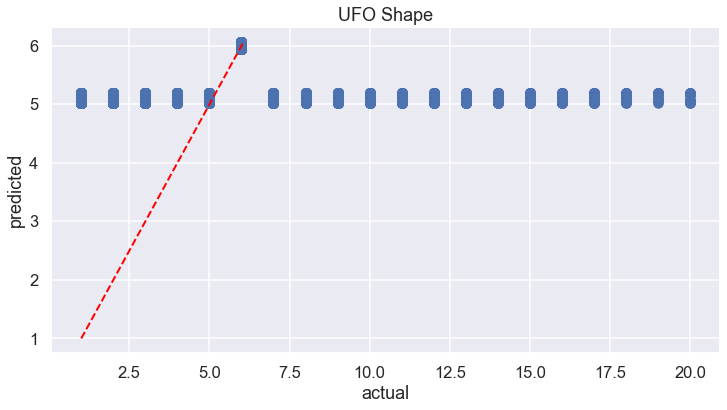

In [36]:
plot_actual_predicted(y_train, reg2.predict(X_train), 'UFO Shape')

In [37]:
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, reg2.predict(X_train)))))
print('r-squared value: {:.4f}'.format(reg2.score(X_train,y_train)))

RMSE: 4.30
r-squared value: 0.0030


### Next we'll create a another model using the predictors with coefficients close to 1

In [38]:
# all columns: ['rural_area', 'city_area', 'observer_alone', 'driving', 'ufo_believer', 'alcohol_consumed', 'multiple_ufo_sighted', 'near_ocean']
df2 = df[ df['state_CA'] == 1 ]
predictors = ['observer_alone', 'ufo_believer']
target = 'shape'
X_ca3 = df2[predictors].values
y_ca3 = df2[target].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_ca2, y_ca2, test_size=0.30, random_state=0)

x = rmse(y_train.mean(), y_test)
print('test, rmse baseline: {0:.1f}'.format(x))

test, rmse baseline: 4.3


In [40]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)
fit3 = reg3.predict(X_test)

print('intercept: {:.2f}'.format(reg3.intercept_.item(0)))
print('coefficients:')
print('\t{:.2f}'.format(reg3.coef_[0]))
print('\t{:.2f}'.format(reg3.coef_[1]))

intercept: 5.03
coefficients:
	0.86
	0.11


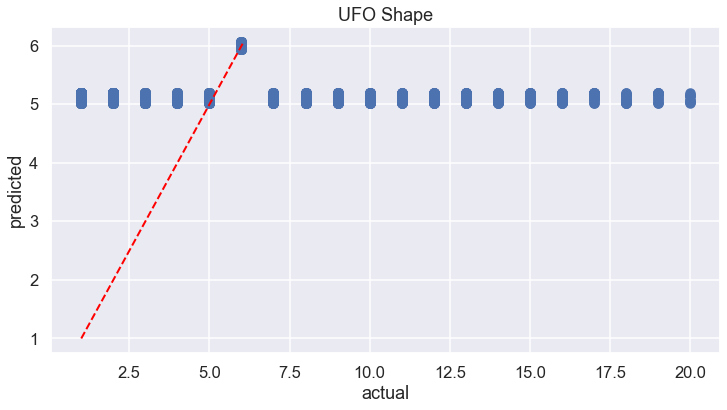

In [41]:
plot_actual_predicted(y_test, reg3.predict(X_test), 'UFO Shape')

In [42]:
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, reg3.predict(X_test)))))
print('r-squared value: {:.4f}'.format(reg3.score(X_test,y_test)))

RMSE: 4.34
r-squared value: 0.0022


## Bringing in Additional Data and a New Research Question

Due to the discrete nature of our target variable being a class of shape, even though we assigned numeric values to each shape, our conclusion is that a linear regression model is not the correct one to use for this problem. Since we don't really have enough numerical features to make any meaninful predictions, we're going to bring in some more data from a dataset containing all of the churches in the US. We will combine that data with what we have in order to predict the number of UFO sightings based on the number of churches in a city.

In [43]:
churches = pd.read_csv('https://query.data.world/s/w2iiqg4xblabbhqg3sq76lk3x2h6rq')
ufos = pd.read_csv('https://query.data.world/s/4vicgqesotkow23wc4q2g22vbrh5kz')

In [44]:
churches['CITY']

0          SACRAMENTO
1           LAFAYETTE
2        WALNUT CREEK
3             HAYWARD
4          SACRAMENTO
             ...     
49323          PAXTON
49324        WESTERLY
49325      WOONSOCKET
49326      WASHINGTON
49327      STONINGTON
Name: CITY, Length: 49328, dtype: object

One thing that is evident from taking a quick look at the church data is that all of its city names are uppercase, while our ufos dataset's city names have pretty inconsistent capitalization. We've got to set all of the city names in the ufos dataset to uppercase to ensure they're compatible with our new data. It will also be helpful to sort all of our data by name.

In [45]:
# Drop columns we don't need
ufos.drop(['date_time', 'stats', 'posted'], axis=1, inplace=True)
ufos.drop(['summary', 'text', 'report_link'], axis=1, inplace=True)
ufos.head(5)

# Drop rows with NA values
ufos.drop(ufos[ufos['city'].isna() | ufos['state'].isna()].index, inplace=True)

# Convert all city names to uppercase
ufos['city'] = ufos['city'].str.upper()

# Sort the values in churches and ufo by city
ufos = ufos.sort_values(by='city')
churches = churches.sort_values(by='CITY')

The only column we really need from the churches dataset is 'CITY'. Since the 'CITY' column is already really clean, we don't have to do anything else to the churches dataset. Now we can create our combined dataset.

In [46]:
# Create the data frame that we will use to combine churches and ufo data
df = pd.DataFrame(data=ufos['city'].unique(), columns=['city'])

Compile our features.

In [47]:
# Create is_cross feature in the ufos dataset
ufos['is_cross'] = (ufos['shape'] == 'cross').astype(int)

# Get the number of sightings in each city
df['num_sightings'] = ufos['city'].value_counts().sort_index().values

df['num_cross_sightings'] = ufos.groupby('city')['is_cross'].sum().values

# Only include cities that are in both datasets
cities = churches['CITY'].unique()
df = df[df['city'].isin(cities)]
df['num_churches'] = churches[churches['CITY'].isin(df['city'])]['CITY'].value_counts().sort_index().values

# Our data after preprocessing and creating features
df.head(10)

,city,num_sightings,num_cross_sightings,num_churches
9,ABBEVILLE,4,0,21
10,ABBOTSFORD,9,0,1
13,ABERDEEN,28,1,18
17,ABILENE,35,0,39
19,ABINGDON,14,0,8
20,ABINGTON,6,0,3
21,ABIQUIU,4,0,1
25,ACCOKEEK,1,0,1
26,ACCOMAC,2,0,1
29,ACKERMAN,2,0,1


## New Linear Regression

In [48]:
X = df[['num_churches', 'num_cross_sightings']].values
y = df['num_sightings'].values
reg = LinearRegression()
reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

[Text(0.5, 0, 'Number of Churches'), Text(0, 0.5, 'Number of Sightings')]

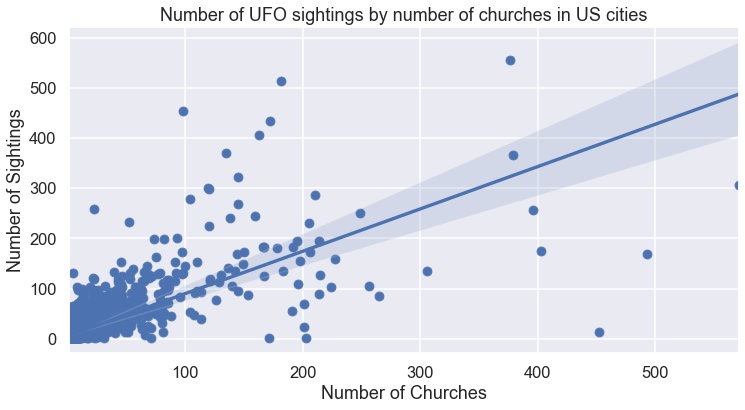

In [49]:
plot = sns.scatterplot(data=df, x='num_churches', y='num_sightings')
sns.regplot(x='num_churches', y='num_sightings', data=df)
plot.set(title='Number of UFO sightings by number of churches in US cities')
plot.set(xlabel='Number of Churches', ylabel='Number of Sightings')

In [51]:
print("Intercept: {:.2f}".format(reg.intercept_))
print("num_churches: {:.3f}".format(reg.coef_[0]))
print("num_cross_sightings: {:.3f}".format(reg.coef_[1]))

r2 = reg.score(X, y)

print("R-Squared: {:.2f}".format(r2))

Intercept: 5.69
num_churches: 0.775
num_cross_sightings: 22.659
R-Squared: 0.57


[[<matplotlib.axis.YTick at 0x148bbb64340>,

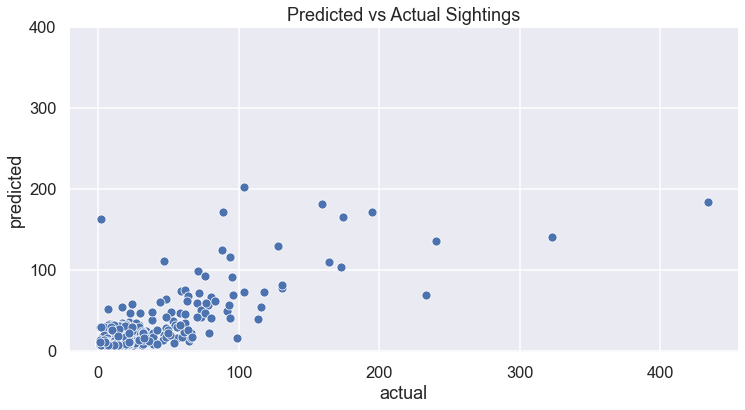

In [67]:
# Graph predicted vs actual sightings
predicted = reg.predict(X_test)

plot2 = sns.scatterplot(x=y_test, y=predicted)
plot2.set(xlabel='actual')
plot2.set(ylabel='predicted')
plot2.set(title='Predicted vs Actual Sightings')
plot2.set(xticks=np.arange(0, 401, 100))
plot2.set(yticks=np.arange(0, 401, 100))

It looks like our model's predictions were pretty consistently lower than the actual data, especially for higher numbers of sightings. A polynomial or exponential model would probably give us better predictions.

In [54]:
rmse = np.sqrt(((y_test - predicted)**2).mean())
print('RMSE:', rmse)

RMSE: 16.824712187743078
